In [87]:
import pandas as pd
import numpy as np
import random
import json
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances


In [88]:
# Data Loading
photos_df = pd.read_csv('C:/Users/lmir/Desktop/Tese/Results_sim/emorecsys_data/CSVs_8_7_2024/csvs_survey/photos.csv', sep=',', encoding='latin-1',low_memory=False)
ratings_df = pd.read_csv('C:/Users/lmir/Desktop/Tese/Results_sim/emorecsys_data/CSVs_8_7_2024/csvs_survey/ratings.csv', sep=',', encoding='latin-1',low_memory=False)
surveys_df = pd.read_csv('C:/Users/lmir/Desktop/Tese/Results_sim/emorecsys_data/CSVs_8_7_2024/csvs_survey/surveys.csv', sep=',', encoding='latin-1',low_memory=False)
annotations_df = pd.read_csv('C:/Users/lmir/Desktop/Tese/Results_sim/emorecsys_data/CSVs_8_7_2024/csvs_survey/annotations.csv', sep=',', encoding='latin-1',low_memory=False)

In [89]:
# def split_emorecsys(dataset, train=0.8, test=0.2):
#     """Divides the dataset in train and test set for each user. Assuring that the test set has at least one
#     item that the user liked and one that the user disliked.

#     Args:
#         dataset (_type_): _description_
#         train (float, optional): portion size for the test set. Defaults to 0.8.
#         test (float, optional): portion size for the test set. Defaults to 0.2.

#     Raises:
#         ValueError: It raises an error when the user doesn't have at least one relevant evaluation

#     Returns:
#         tuple: contains the train and test sets that are a lists of tuples (uid, iid, rating).
#     """
#     trainset, testset = list(), list()
#     user_unilked_any = []

#     for user in list(set(dataset['id_survey'])):
#         user_ratings = dataset[dataset['id_survey'] == user]
#         all_ratings = list((user, id_photo, like_bool) for id_photo, like_bool in zip(user_ratings['id_photo'], user_ratings['like_bool']))
#         size_ratings = len(all_ratings)

#         user_trainset = []

#         # Selects the relevant ratings (like_bool = 1) and the not relevant (like_bool = 0)
#         relevant = list(x for x in all_ratings if x[2] == 1)
#         not_relevant = list(x for x in all_ratings if x[2] == 0)

#         user_testset = []

#         if relevant:  # if the user has one relevant rating
#             new_rating = random.sample(relevant, 1)
#             user_testset.extend(new_rating)
#         else:
#             raise ValueError('The user ' + str(user) + ' did not like any photo')

#         if not_relevant:  # If the user has a not relevant rating
#             new_rating = random.sample(not_relevant, 1)
#             user_testset.extend(new_rating)
#         else:
#             user_unilked_any.append(user)
        
#         remaining_ratings = [x for x in all_ratings if x not in user_testset]
#         random.shuffle(remaining_ratings)

#         while len(user_testset) < int(size_ratings * test):
#             new_rating = remaining_ratings.pop(0)
#             if new_rating not in user_testset:
#                 user_testset.append(new_rating)

#         user_trainset = [x for x in all_ratings if x not in user_testset]

#         trainset.extend(user_trainset)
#         testset.extend(user_testset)

#         expected_test_size = int(size_ratings * test)
#         expected_train_size = int(size_ratings * train) 

#         assert len(user_testset) == expected_test_size
#         assert len(user_trainset) == expected_train_size

#     return trainset, testset

In [90]:
photo_df_w_views = photos_df[photos_df['views'] > 0]
photo_ids = photo_df_w_views['id']
photo_ids = photo_ids.to_list()
print(photo_ids)

ratings_emo_df = ratings_df[ratings_df['id_photo'].isin(photo_ids)]

[2, 6, 14, 25, 32, 38, 39, 40, 46, 55, 60, 62, 80, 93, 94, 95, 98, 99, 113, 118, 123, 128, 129, 136, 137, 142, 148, 155, 158, 166, 169, 174, 177, 184, 186, 193, 205, 208, 215, 216, 227, 230, 231, 235, 243, 248, 250, 257, 271, 278, 298, 310, 316, 318, 319, 321, 327, 336, 340, 342, 346, 347, 348, 354, 364, 365, 379, 380, 381, 383, 390, 400, 402, 407, 414, 415, 421, 426, 429, 438, 453, 459, 461, 464, 471, 474, 476, 480, 481, 484, 494, 498, 500, 524, 530, 534, 542, 544, 546, 550, 551, 556, 557, 559, 560, 567, 584, 598, 599, 601, 611, 612, 615, 629, 634, 644, 645, 652, 655, 667, 674, 675, 681, 689, 692, 698, 699, 706, 724, 731, 732, 736, 738, 739, 746, 748, 749, 750, 756, 766, 767, 769, 773, 780, 791, 835, 845, 853, 857, 861, 864, 865, 880, 887, 889, 890, 925, 948, 953, 954, 969, 980, 986, 990, 991, 993, 996, 1007, 1012, 1013, 1034, 1038, 1044, 1045, 1047, 1055, 1059, 1078, 1080, 1082, 1087, 1089, 1091, 1100, 1104, 1112, 1127, 1142, 1146, 1151, 1156, 1165, 1176, 1194, 1197, 1201, 1202, 1223

In [91]:
ratings_df

,id,id_photo,id_survey,like_bool,anger,fear,disgust,sadness,happiness,surprise,neutral,valence,arousal,dominance
0,1,1754,1,1,0,0,0,0,0,0,5,3,1,2
1,2,1785,1,1,0,0,0,2,0,0,0,2,2,3
2,3,123,1,0,0,0,0,4,0,0,0,1,3,1
3,4,2315,1,0,0,0,0,2,0,0,0,2,1,3
4,5,1548,1,0,0,0,0,0,0,0,5,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,2441,2546,163,0,0,5,0,5,0,0,0,1,5,1
2441,2442,2097,163,0,0,0,3,0,5,0,0,2,2,1
2442,2443,1898,163,0,0,0,3,5,0,1,0,1,4,1
2443,2444,1871,163,0,0,0,0,5,0,0,0,1,1,1


In [92]:
ratings_emo_df

,id,id_photo,id_survey,like_bool,anger,fear,disgust,sadness,happiness,surprise,neutral,valence,arousal,dominance
0,1,1754,1,1,0,0,0,0,0,0,5,3,1,2
1,2,1785,1,1,0,0,0,2,0,0,0,2,2,3
2,3,123,1,0,0,0,0,4,0,0,0,1,3,1
3,4,2315,1,0,0,0,0,2,0,0,0,2,1,3
4,5,1548,1,0,0,0,0,0,0,0,5,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,2441,2546,163,0,0,5,0,5,0,0,0,1,5,1
2441,2442,2097,163,0,0,0,3,0,5,0,0,2,2,1
2442,2443,1898,163,0,0,0,3,5,0,1,0,1,4,1
2443,2444,1871,163,0,0,0,0,5,0,0,0,1,1,1


In [93]:
ratings_df

,id,id_photo,id_survey,like_bool,anger,fear,disgust,sadness,happiness,surprise,neutral,valence,arousal,dominance
0,1,1754,1,1,0,0,0,0,0,0,5,3,1,2
1,2,1785,1,1,0,0,0,2,0,0,0,2,2,3
2,3,123,1,0,0,0,0,4,0,0,0,1,3,1
3,4,2315,1,0,0,0,0,2,0,0,0,2,1,3
4,5,1548,1,0,0,0,0,0,0,0,5,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,2441,2546,163,0,0,5,0,5,0,0,0,1,5,1
2441,2442,2097,163,0,0,0,3,0,5,0,0,2,2,1
2442,2443,1898,163,0,0,0,3,5,0,1,0,1,4,1
2443,2444,1871,163,0,0,0,0,5,0,0,0,1,1,1


In [94]:
trainset, testset = split_emorecsys(ratings_emo_df)

NameError: name 'split_emorecsys' is not defined

In [ ]:
print(len(testset))
print(len(trainset))

NameError: name 'testset' is not defined

In [ ]:
# # Converter para DataFrame
# df = pd.DataFrame(trainset, columns=['user_id', 'item_id', 'rating'])

# # Salvar em CSV
# df.to_csv('trainset_emotions.csv', index=False)

In [ ]:
# # Converter para DataFrame
# df = pd.DataFrame(testset, columns=['user_id', 'item_id', 'rating'])

# # Salvar em CSV
# df.to_csv('testset_emotions.csv', index=False)

In [ ]:
#Go fetch the train and test
testset = pd.read_csv('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/csvs/testset_emotions.csv')
trainset = pd.read_csv('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/csvs/trainset_emotions.csv')

# Converter de volta para lista de tuplas
testset = [tuple(row) for row in testset.to_numpy()]
trainset = [tuple(row) for row in trainset.to_numpy()]

# Exibir os dados carregados
print(len(testset))
print(len(trainset))

489
1956


In [ ]:
df_random_items_per_user = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/random_items_per_user_emotions.json')
df_random_items_per_user

,1,2,3,4,5,6,7,8,9,10,...,154,155,156,157,158,159,160,161,162,163
0,1078,2319,1417,1317,3054,1881,2745,2444,1246,1980,...,1600,2288,2789,2727,128,1127,2098,1891,1853,316
1,2618,1525,674,1127,257,2621,1979,560,177,113,...,340,2098,40,1778,612,2074,567,3047,3037,2369
2,2839,1236,2583,1872,1235,2516,857,429,1980,880,...,991,2559,60,1737,2844,1521,2789,1567,257,2594
3,1415,1848,55,599,1087,429,2780,1940,1078,1966,...,3041,1725,1892,2143,1858,2137,1059,2922,1642,2341
4,227,2799,2405,2191,1771,1816,2995,2366,1100,3004,...,1979,2940,1665,748,2839,2673,2457,1055,1771,2358
5,319,857,1940,1747,925,1628,1341,655,530,137,...,1194,2482,1202,364,1548,559,2192,534,2306,1287
6,193,2192,148,1730,2896,383,2755,46,1038,400,...,2937,2286,3004,1785,1725,3018,2632,2193,2745,2892
7,2352,1142,1871,2738,2053,319,2674,2114,137,2521,...,2677,2751,461,2366,1395,464,1720,1339,1801,415
8,1165,2435,2868,1645,681,692,2799,2673,1302,1342,...,1681,1007,98,354,1778,128,1980,2285,731,1362
9,421,1881,1818,2202,2985,2536,142,1721,2678,2811,...,542,3032,1194,2237,2367,2406,99,3018,1513,2287


In [ ]:
json_path = 'C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/random_items_per_user_emotions.json'
with open(json_path, 'r') as file:
    random_items_dict = json.load(file)

random_items_dict = {int(key): value for key, value in random_items_dict.items()}
random_items_dict

{1: [1078,
  2618,
  2839,
  1415,
  227,
  319,
  193,
  2352,
  1165,
  421,
  2702,
  2674,
  2367,
  2848,
  2303,
  530,
  2810,
  383,
  1424,
  1725],
 2: [2319,
  1525,
  1236,
  1848,
  2799,
  857,
  2192,
  1142,
  2435,
  1881,
  953,
  426,
  1428,
  1738,
  498,
  2476,
  2989,
  584,
  2895,
  346],
 3: [1417,
  674,
  2583,
  55,
  2405,
  1940,
  148,
  1871,
  2868,
  1818,
  2234,
  1237,
  340,
  2344,
  2137,
  1247,
  546,
  1521,
  1612,
  1045],
 4: [1317,
  1127,
  1872,
  599,
  2191,
  1747,
  1730,
  2738,
  1645,
  2202,
  3042,
  1080,
  3059,
  38,
  3015,
  1247,
  1792,
  732,
  2740,
  2848],
 5: [3054,
  257,
  1235,
  1087,
  1771,
  925,
  2896,
  2053,
  681,
  2985,
  128,
  1747,
  889,
  2259,
  2195,
  2089,
  316,
  347,
  1543,
  2369],
 6: [1881,
  2621,
  2516,
  429,
  1816,
  1628,
  383,
  319,
  692,
  2536,
  1771,
  969,
  2702,
  2736,
  2745,
  1246,
  1352,
  1554,
  1429,
  1763],
 7: [2745,
  1979,
  857,
  2780,
  2995,
  1341,


In [ ]:
def evaluate_metrics(recommendations, testset, ks):
    """
    Calculates precision, recall, and F1-score for different values of k, based on the recommendations and the test set.

    Args:
        recommendations (dict): A dictionary where keys are user IDs and values are lists of recommended item IDs.
        testset (Dataset): The test dataset containing user-item interactions with ratings.
        ks (list): A list of integer values for k, representing the number of top recommendations to evaluate.

    Returns:
        tuple: Three dictionaries (precisions, recalls, f1_scores) where each key is a value of k and the values are dictionaries mapping user IDs to their respective precision, recall, and F1-score for that k.
    """

    relevant_items_dict = {}
    test_df = pd.DataFrame(testset, columns=['uid', 'iid', 'rating'])
    for user in test_df['uid'].unique():
        user_test_df = test_df[test_df['uid'] == user]
        relevant_items = set(user_test_df[user_test_df['rating'] > 0]['iid'])
        relevant_items_dict[user] = relevant_items

    precisions = {k: {} for k in ks}
    recalls = {k: {} for k in ks}
    f1_scores = {k: {} for k in ks}

    for user, relevant_items in relevant_items_dict.items():
        relevant_set = set(relevant_items)
        # print('relevant_set')
        # print(relevant_set)
        for k in ks:
            top_k_recommendations = set(recommendations[user][:k])
            relevant_and_recommended = top_k_recommendations & relevant_set #Interseption between the recommended and relevant
            # print('relevant_and_recommended')
            # print(relevant_and_recommended)
            rel_rec = len(relevant_and_recommended)
            precision = rel_rec / k if k > 0 else 0.0
            recall = rel_rec / len(relevant_set) if relevant_set else 0.0
            f1score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

            precisions[k][user] = precision
            recalls[k][user] = recall
            f1_scores[k][user] = f1score

    return precisions, recalls, f1_scores

def evaluate_metrics_avg(precisions, recalls, f1scores):
    """Calculates the average precision, recall, an f1-score for different values of k,
    based on the precision, recall, and f1-score metrics calculated for each user

    Args:
        precisions (dict): keys are the values of k and the values are dicts where the keys are the user ids
        and their precision score
        recalls (dict): keys are the values of k and the values are dicts where the keys are the user ids
        and their recall score
        f1scores (dict): keys are the values of k and the values are dicts where the keys are the user ids
        and their f1-score score

    Returns:
        tuple: containing three dicts:
        
        -avg_precisions: average precision score for the values of k, the keys are the values of k
        and the values are the corresponding average precision scores
        -avg_recalls: average precision score for the values of k, the keys are the values of k
        and the values are the corresponding average recall scores
        -avg_f1-scores: average precision score for the values of k, the keys are the values of k
        and the values are the corresponding average f1-scores
    """

    avg_precisions = {k: round(sum(precisions[k].values()) / len(precisions[k]), 4) for k in precisions}
    avg_recalls = {k: round(sum(recalls[k].values()) / len(recalls[k]), 4) for k in recalls}
    avg_f1scores = {k: round(sum(f1scores[k].values()) / len(f1scores[k]), 4) for k in f1scores}

    # print(avg_precisions)
    return avg_precisions, avg_recalls, avg_f1scores

In [ ]:
emotions_columns = ['anger', 'fear', 'disgust', 'sadness', 'happiness', 'surprise', 'neutral', 'valence', 'arousal', 'dominance']

mean_emotions_per_photo_df = ratings_df.groupby('id_photo')[emotions_columns].mean().reset_index()

mean_emotions_per_photo_df

,id_photo,anger,fear,disgust,sadness,happiness,surprise,neutral,valence,arousal,dominance
0,2,0.0,3.090909,1.090909,0.0,0.363636,1.090909,0.0,2.454545,3.272727,2.727273
1,6,0.0,2.400000,0.000000,0.0,0.000000,1.600000,0.0,3.200000,3.000000,2.800000
2,14,0.0,2.800000,0.600000,0.0,0.000000,0.000000,0.0,2.200000,3.000000,2.800000
3,25,0.0,1.000000,0.000000,0.8,0.000000,0.000000,0.4,1.600000,2.200000,2.200000
4,32,0.0,0.000000,0.000000,0.0,4.666667,0.000000,0.0,5.000000,3.333333,2.666667
...,...,...,...,...,...,...,...,...,...,...,...
548,3054,0.0,0.000000,0.000000,1.8,2.000000,0.800000,0.0,4.000000,3.000000,3.600000
549,3057,0.0,0.400000,0.000000,2.8,0.000000,0.000000,0.0,2.400000,1.600000,2.400000
550,3059,0.0,0.000000,0.000000,2.8,0.000000,0.000000,0.6,2.600000,2.000000,2.600000
551,3062,0.0,0.000000,0.000000,3.0,0.000000,0.000000,0.0,1.000000,1.000000,2.000000


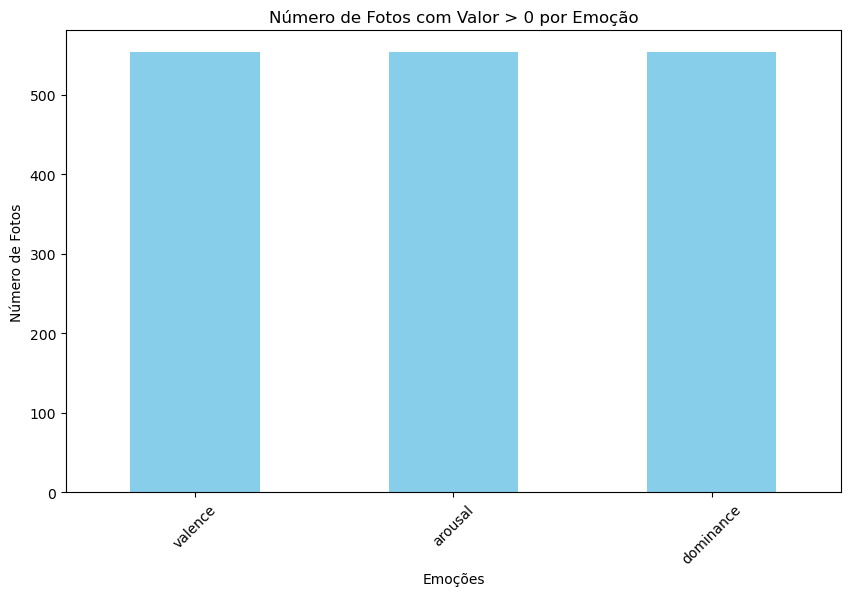

In [ ]:
emotion_columns_cat = ['valence', 'arousal', 'dominance']
emotion_counts = (mean_emotions_per_photo_df[emotion_columns_cat] > 0).sum()

# Plotar os resultados
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Número de Fotos com Valor > 0 por Emoção')
plt.xlabel('Emoções')
plt.ylabel('Número de Fotos')
plt.xticks(rotation=45)
plt.show()

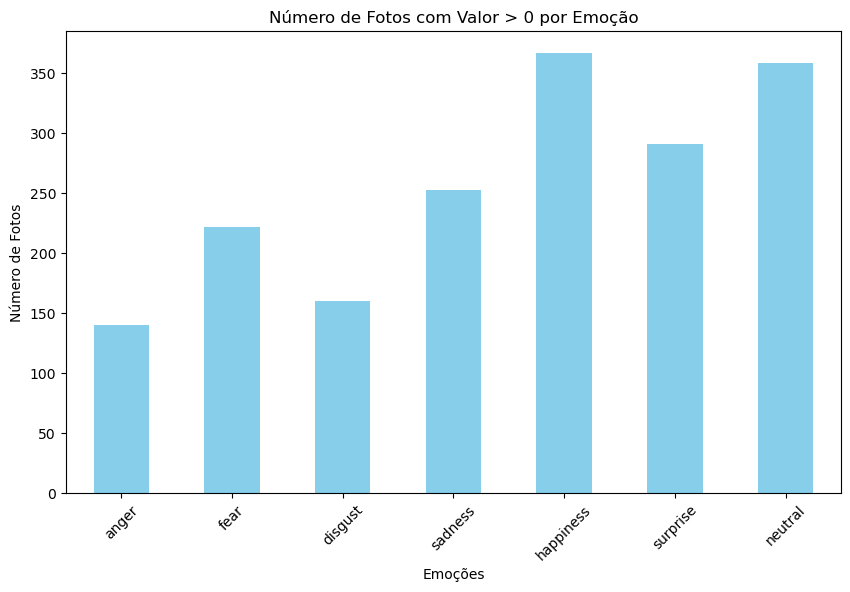

In [ ]:
emotion_columns_dim = ['anger', 'fear', 'disgust', 'sadness', 'happiness', 'surprise', 'neutral']
emotion_counts = (mean_emotions_per_photo_df[emotion_columns_dim] > 0).sum()

# Plotar os resultados
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Número de Fotos com Valor > 0 por Emoção')
plt.xlabel('Emoções')
plt.ylabel('Número de Fotos')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Categorical Emotions Dict that removes the user predictions and makes

mean_emotions_by_user_cat = {}

for user_id in ratings_df['id_survey'].unique():
    user_ratings_df = ratings_df[ratings_df['id_survey'] != user_id]
    mean_emotions = user_ratings_df.groupby('id_photo')[['anger', 'fear', 'disgust', 'sadness', 'happiness', 'surprise', 'neutral']].mean().reset_index()
    mean_emotions['emotion_array'] = mean_emotions[['anger', 'fear', 'disgust', 'sadness', 'happiness', 'surprise', 'neutral']].values.tolist()
    mean_emotions = mean_emotions.drop(columns=['anger', 'fear', 'disgust', 'sadness', 'happiness', 'surprise', 'neutral'])
    if len(mean_emotions) != len(photo_ids):
        photo_missing_ids = [photo_id for photo_id in photo_ids if photo_id not in mean_emotions['id_photo'].values]
        # print(photo_missing_ids)

        df = pd.DataFrame({
        'id_photo': photo_missing_ids,
        'emotion_array': [[0,0,0,0,0,0,0]] * len(photo_missing_ids)  # Lista de 0s com o mesmo comprimento de photo_ids
        })
        mean_emotions = pd.concat([mean_emotions, df], ignore_index=True)
    mean_emotions_by_user_cat[user_id] = mean_emotions

mean_emotions_by_user_cat

{1:      id_photo                                      emotion_array
 0           2  [0.0, 3.090909090909091, 1.0909090909090908, 0...
 1           6                [0.0, 2.4, 0.0, 0.0, 0.0, 1.6, 0.0]
 2          14                [0.0, 2.8, 0.6, 0.0, 0.0, 0.0, 0.0]
 3          25                [0.0, 1.0, 0.0, 0.8, 0.0, 0.0, 0.4]
 4          32  [0.0, 0.0, 0.0, 0.0, 4.666666666666667, 0.0, 0.0]
 ..        ...                                                ...
 548       986                              [0, 0, 0, 0, 0, 0, 0]
 549      1142                              [0, 0, 0, 0, 0, 0, 0]
 550      1548                              [0, 0, 0, 0, 0, 0, 0]
 551      1754                              [0, 0, 0, 0, 0, 0, 0]
 552      2922                              [0, 0, 0, 0, 0, 0, 0]
 
 [553 rows x 2 columns],
 2:      id_photo                                      emotion_array
 0           2  [0.0, 3.090909090909091, 1.0909090909090908, 0...
 1           6                [0.0, 2.4, 0.

In [ ]:
mean_emotions_by_user_profile_cat = {}

for user_id in ratings_df['id_survey'].unique():
    user_ratings_df = ratings_df[ratings_df['id_survey'] == user_id]
    emotions_df = user_ratings_df[['id_photo', 'anger', 'fear', 'disgust', 'sadness', 'happiness', 'surprise', 'neutral']]
    emotions_df = emotions_df.assign(emotion_array=emotions_df[['anger', 'fear', 'disgust', 'sadness', 'happiness', 'surprise', 'neutral']].values.tolist())
    emotions_df = emotions_df.drop(columns=['anger', 'fear', 'disgust', 'sadness', 'happiness', 'surprise', 'neutral'])
    mean_emotions_by_user_profile_cat[user_id] = emotions_df

mean_emotions_by_user_profile_cat

{1:     id_photo          emotion_array
 0       1754  [0, 0, 0, 0, 0, 0, 5]
 1       1785  [0, 0, 0, 2, 0, 0, 0]
 2        123  [0, 0, 0, 4, 0, 0, 0]
 3       2315  [0, 0, 0, 2, 0, 0, 0]
 4       1548  [0, 0, 0, 0, 0, 0, 5]
 5       1055  [0, 0, 0, 0, 3, 0, 0]
 6       1738  [0, 0, 0, 0, 3, 0, 0]
 7       2922  [0, 0, 0, 0, 0, 0, 3]
 8        318  [0, 0, 0, 2, 0, 0, 0]
 9        948  [0, 0, 0, 0, 0, 0, 3]
 10       986  [3, 0, 0, 0, 0, 0, 0]
 11      1142  [0, 0, 0, 0, 1, 0, 0]
 12       889  [0, 0, 0, 2, 0, 0, 0]
 13      1059  [0, 0, 0, 0, 4, 0, 0]
 14      1507  [0, 0, 0, 0, 3, 0, 0],
 2:     id_photo          emotion_array
 15      1778  [0, 0, 0, 1, 0, 0, 3]
 16       379  [3, 4, 0, 4, 0, 0, 0]
 17       342  [4, 0, 5, 5, 0, 0, 0]
 18      1898  [0, 0, 0, 4, 0, 0, 5]
 19      2121  [0, 0, 0, 0, 4, 0, 0]
 20      2370  [0, 0, 0, 0, 1, 0, 3]
 21        25  [0, 0, 0, 3, 0, 0, 0]
 22       991  [0, 0, 0, 0, 0, 0, 5]
 23       667  [0, 0, 0, 0, 4, 0, 0]
 24      2234  [0, 0, 0, 0, 0, 

In [ ]:
photo_ids

[2,
 6,
 14,
 25,
 32,
 38,
 39,
 40,
 46,
 55,
 60,
 62,
 80,
 93,
 94,
 95,
 98,
 99,
 113,
 118,
 123,
 128,
 129,
 136,
 137,
 142,
 148,
 155,
 158,
 166,
 169,
 174,
 177,
 184,
 186,
 193,
 205,
 208,
 215,
 216,
 227,
 230,
 231,
 235,
 243,
 248,
 250,
 257,
 271,
 278,
 298,
 310,
 316,
 318,
 319,
 321,
 327,
 336,
 340,
 342,
 346,
 347,
 348,
 354,
 364,
 365,
 379,
 380,
 381,
 383,
 390,
 400,
 402,
 407,
 414,
 415,
 421,
 426,
 429,
 438,
 453,
 459,
 461,
 464,
 471,
 474,
 476,
 480,
 481,
 484,
 494,
 498,
 500,
 524,
 530,
 534,
 542,
 544,
 546,
 550,
 551,
 556,
 557,
 559,
 560,
 567,
 584,
 598,
 599,
 601,
 611,
 612,
 615,
 629,
 634,
 644,
 645,
 652,
 655,
 667,
 674,
 675,
 681,
 689,
 692,
 698,
 699,
 706,
 724,
 731,
 732,
 736,
 738,
 739,
 746,
 748,
 749,
 750,
 756,
 766,
 767,
 769,
 773,
 780,
 791,
 835,
 845,
 853,
 857,
 861,
 864,
 865,
 880,
 887,
 889,
 890,
 925,
 948,
 953,
 954,
 969,
 980,
 986,
 990,
 991,
 993,
 996,
 1007,
 1012,
 101

In [ ]:
mean_emotions_by_user_dim = {}

for user_id in ratings_df['id_survey'].unique():
    user_ratings_df = ratings_df[ratings_df['id_survey'] != user_id]
    mean_emotions = user_ratings_df.groupby('id_photo')[['dominance', 'arousal', 'valence']].mean().reset_index()
    mean_emotions['emotion_array'] = mean_emotions[['dominance', 'arousal', 'valence']].values.tolist()
    mean_emotions = mean_emotions.drop(columns=['dominance', 'arousal', 'valence'])
    if len(mean_emotions) != len(photo_ids):
        photo_missing_ids = [photo_id for photo_id in photo_ids if photo_id not in mean_emotions['id_photo'].values]
        # print(photo_missing_ids)

        df = pd.DataFrame({
        'id_photo': photo_missing_ids,
        'emotion_array': [[0,0,0]] * len(photo_missing_ids)  # Lista de 0s com o mesmo comprimento de photo_ids
        })
        mean_emotions = pd.concat([mean_emotions, df], ignore_index=True)
    mean_emotions_by_user_dim[user_id] = mean_emotions
    # print(mean_emotions_by_user_dim)

mean_emotions_by_user_dim

{1:      id_photo                                      emotion_array
 0           2  [2.727272727272727, 3.272727272727273, 2.45454...
 1           6                                    [2.8, 3.0, 3.2]
 2          14                                    [2.8, 3.0, 2.2]
 3          25                                    [2.2, 2.2, 1.6]
 4          32      [2.6666666666666665, 3.3333333333333335, 5.0]
 ..        ...                                                ...
 548       986                                          [0, 0, 0]
 549      1142                                          [0, 0, 0]
 550      1548                                          [0, 0, 0]
 551      1754                                          [0, 0, 0]
 552      2922                                          [0, 0, 0]
 
 [553 rows x 2 columns],
 2:      id_photo                                      emotion_array
 0           2  [2.727272727272727, 3.272727272727273, 2.45454...
 1           6                             

In [ ]:
mean_emotions_by_user_profile_dim = {}

for user_id in ratings_df['id_survey'].unique():
    user_ratings_df = ratings_df[ratings_df['id_survey'] == user_id]
    emotions_df = user_ratings_df[['id_photo','dominance', 'arousal', 'valence']]
    emotions_df = emotions_df.assign(emotion_array=emotions_df[['dominance', 'arousal', 'valence']].values.tolist())
    emotions_df = emotions_df.drop(columns=['dominance', 'arousal', 'valence'])
    mean_emotions_by_user_profile_dim[user_id] = emotions_df

mean_emotions_by_user_profile_dim

{1:     id_photo emotion_array
 0       1754     [2, 1, 3]
 1       1785     [3, 2, 2]
 2        123     [1, 3, 1]
 3       2315     [3, 1, 2]
 4       1548     [3, 1, 3]
 5       1055     [4, 3, 4]
 6       1738     [4, 4, 4]
 7       2922     [4, 2, 3]
 8        318     [2, 2, 2]
 9        948     [2, 2, 3]
 10       986     [4, 4, 2]
 11      1142     [3, 1, 3]
 12       889     [2, 3, 2]
 13      1059     [3, 3, 5]
 14      1507     [3, 2, 4],
 2:     id_photo emotion_array
 15      1778     [1, 2, 3]
 16       379     [2, 3, 1]
 17       342     [3, 2, 1]
 18      1898     [1, 1, 3]
 19      2121     [2, 1, 5]
 20      2370     [1, 1, 3]
 21        25     [2, 2, 2]
 22       991     [1, 1, 3]
 23       667     [1, 2, 5]
 24      2234     [1, 1, 3]
 25       544     [1, 1, 4]
 26      1621     [1, 1, 3]
 27        40     [1, 1, 4]
 28      1872     [1, 1, 3]
 29      2211     [1, 1, 3],
 3:     id_photo emotion_array
 30       316     [4, 1, 3]
 31      1569     [3, 3, 4]
 32      

In [ ]:
def compute_cosine_similarity_matrix_by_user(mean_emotions_by_user, mean_emotions_profile, trainset, testset):
    test_df = pd.DataFrame(testset, columns=['uid', 'iid', 'rating'])
    train_df = pd.DataFrame(trainset, columns=['uid', 'iid', 'rating'])
    similarity_dfs = {}

    for user_id in test_df['uid'].unique():
        user_train_ids = train_df[train_df['uid'] == user_id]['iid'].tolist()
        
        user_means = mean_emotions_by_user.get(user_id)
        user_profile = mean_emotions_profile.get(user_id)
        user_profile_train = user_profile[user_profile['id_photo'].isin(user_train_ids)]

        emotion_arrays_means = np.array(user_means['emotion_array'].tolist())
        emotion_arrays_user = np.array(user_profile_train['emotion_array'].tolist())

        similarity_matrix = cosine_similarity(emotion_arrays_means , emotion_arrays_user )

        similarity_df = pd.DataFrame(similarity_matrix, index=user_means['id_photo'], columns=user_profile_train['id_photo'])

        if similarity_df.columns.is_unique == False:
            print('PROBLEM COLUMNS')

        if similarity_df.index.is_unique == False:
            print('PROBLEM INDEXS')

        assert similarity_df.columns.is_unique, f"Duplicated columns in similarity_df: {similarity_df.columns[similarity_df.columns.duplicated()]}"
        assert similarity_df.index.is_unique, f"Duplicated indices in similarity_df: {similarity_df.index[similarity_df.index.duplicated()]}"

        
        similarity_dfs[user_id] = similarity_df
        
    return similarity_dfs

In [ ]:
def similar_items(item_to_recommend, user_profile_items, similarity_matrix_df, n=12):
    train_items_scores = similarity_matrix_df.loc[item_to_recommend]#, similarity_matrix_df.columns.isin(user_profile_items)]

    tuples_ids_score = list(zip(train_items_scores.index, train_items_scores.values))
    tuples_ids_score.sort(key=lambda x: x[1], reverse=True)
    item_ids = [item for item, _ in tuples_ids_score]
    # return item_ids[:n]
    return tuples_ids_score[:n] ,item_ids[:n]

In [ ]:
def recommend_items_by_user_cos(trainset, testset, mean_emotions_by_user, mean_emotions_profile, n, metric, random_items_dict):

    train_df = pd.DataFrame(trainset, columns=['uid', 'iid', 'rating'])
    test_df = pd.DataFrame(testset, columns=['uid', 'iid', 'rating'])

    items_all_ids = set(train_df['iid'].to_list() + test_df['iid'].to_list())

    simlarity_dfs = compute_cosine_similarity_matrix_by_user(mean_emotions_by_user, mean_emotions_profile, trainset, testset)
    recommendations = {}

    for user in test_df['uid'].unique():

        similartity_df_user = simlarity_dfs.get(user)
        user_train = train_df[train_df['uid'] == user]
        user_test = test_df[test_df['uid'] == user]

        train_item_ids = user_train['iid'].to_list()
        test_item_ids = user_test['iid'].to_list()

        items_to_recommend = []

        random_items = random_items_dict[user]

        # Metric 1 - médria dos ratings
        if metric == 1:
            for item in random_items:
                item_sim_tuple, item_train_id = similar_items(item, train_item_ids, similartity_df_user, n)
                item_sim_df = user_train[user_train['iid'].isin(item_train_id)]
                ratings = item_sim_df['rating'].tolist()
                mean_value_ratings = np.mean(ratings)  # if ratings else 0
                items_to_recommend.append((item, mean_value_ratings, item_sim_tuple[0][1]))

            for test_item in test_item_ids:
                item_sim_tuple, item_train_id = similar_items(test_item, train_item_ids, similartity_df_user, n)
                item_sim_df = user_train[user_train['iid'].isin(item_train_id)]
                ratings = item_sim_df['rating'].tolist()
                mean_value_ratings = np.mean(ratings) if ratings else 0
                items_to_recommend.append((test_item, mean_value_ratings, item_sim_tuple[0][1]))

        # Metric 2
        if metric == 2:
            for item in random_items:
                item_random_sim , item_random_sim_id = similar_items(item, train_item_ids, similartity_df_user, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score * rating)
                    sum_sim = sum_sim + sim_score
                item_value = sum_user/sum_sim
                items_to_recommend.append((item, item_value, item_random_sim[0][1]))

            for item_test in test_item_ids:
                item_random_sim , item_random_sim_id = similar_items(item_test, train_item_ids, similartity_df_user, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score * rating)
                    sum_sim = sum_sim + sim_score
                item_value = sum_user/sum_sim
                items_to_recommend.append((item_test, item_value,  item_random_sim[0][1]))

        # Metric 3
        if metric == 3:
            for item in random_items:
                item_random_sim , item_random_sim_id = similar_items(item, train_item_ids, similartity_df_user, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score**2 * rating)
                    sum_sim = sum_sim + (sim_score**2)
                item_value = sum_user/sum_sim
                items_to_recommend.append((item, item_value,item_random_sim[0][1]))

            for item_test in test_item_ids:
                item_random_sim , item_random_sim_id = similar_items(item_test, train_item_ids, similartity_df_user, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score**2 * rating)
                    sum_sim = sum_sim + sim_score**2
                item_value = sum_user/sum_sim
                items_to_recommend.append((item_test, item_value,item_random_sim[0][1]))

            
        # print(items_to_recommend)
        items_to_recommend = sorted(items_to_recommend, key=lambda x: (x[1], x[2]), reverse=True)  
        # print(items_to_recommend)
        # items_to_recommend.sort(key=lambda x: x[1], reverse=True)
        # print(items_to_recommend[:10])
        items_to_recommend_ids = [item for item, _, _ in items_to_recommend]

        recommendations[user] = items_to_recommend_ids[:10]

    return recommendations

In [ ]:
def compute_euclidean_similarity_matrix_by_user(mean_emotions_by_user, mean_emotions_profile, trainset, testset):
    test_df = pd.DataFrame(testset, columns=['uid', 'iid', 'rating'])
    train_df = pd.DataFrame(trainset, columns=['uid', 'iid', 'rating'])
    similarity_dfs = {}

    for user_id in test_df['uid'].unique():
        user_train_ids = train_df[train_df['uid'] == user_id]['iid'].tolist()
        
        user_means = mean_emotions_by_user.get(user_id)
        user_profile = mean_emotions_profile.get(user_id)
        user_profile_train = user_profile[user_profile['id_photo'].isin(user_train_ids)]

        emotion_arrays_means = np.array(user_means['emotion_array'].tolist())
        # print(emotion_arrays_means)
        emotion_arrays_user = np.array(user_profile_train['emotion_array'].tolist())

        emotion_arrays_means_normalized = normalize(emotion_arrays_means, norm='l2')
        # print(emotion_arrays_means_normalized)
        emotion_arrays_user_normalized = normalize(emotion_arrays_user, norm='l2')

        similarity_matrix = euclidean_distances(emotion_arrays_means_normalized , emotion_arrays_user_normalized)

        similarity_df = pd.DataFrame(similarity_matrix, index=user_means['id_photo'], columns=user_profile_train['id_photo'])

        if similarity_df.columns.is_unique == False:
            print('PROBLEM COLUMNS')

        if similarity_df.index.is_unique == False:
            print('PROBLEM INDEXS')
        
        similarity_dfs[user_id] = similarity_df
        
    return similarity_dfs

In [101]:
def recommend_items_by_user_eucl(trainset, testset, mean_emotions_by_user, mean_emotions_profile, n, metric, random_items_dict):
    train_df = pd.DataFrame(trainset, columns=['uid', 'iid', 'rating'])
    test_df = pd.DataFrame(testset, columns=['uid', 'iid', 'rating'])

    items_all_ids = set(train_df['iid'].to_list() + test_df['iid'].to_list())

    simlarity_dfs = compute_euclidean_similarity_matrix_by_user(mean_emotions_by_user, mean_emotions_profile, trainset, testset)
    recommendations = {}

    for user in test_df['uid'].unique():

        similartity_df_user = simlarity_dfs.get(user)
        user_train = train_df[train_df['uid'] == user]
        user_test = test_df[test_df['uid'] == user]

        train_item_ids = user_train['iid'].to_list()
        test_item_ids = user_test['iid'].to_list()

        items_to_recommend = []

        random_items = random_items_dict[user]

        # Metric 1 - médria dos ratings
        if metric == 1:
            for item in random_items:
                item_sim_tuple, item_train_id = similar_items(item, train_item_ids, similartity_df_user, n)
                item_sim_df = user_train[user_train['iid'].isin(item_train_id)]
                desempate = 0
                for i in range(len(item_sim_tuple)):
                    ab = item_sim_df[item_sim_df['iid']==item_sim_tuple[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_sim_tuple[i][1]
                        break
                ratings = item_sim_df['rating'].tolist()
                mean_value_ratings = np.mean(ratings)  # if ratings else 0
                items_to_recommend.append((item, mean_value_ratings, desempate))

            for test_item in test_item_ids:
                item_sim_tuple, item_train_id = similar_items(test_item, train_item_ids, similartity_df_user, n)
                item_sim_df = user_train[user_train['iid'].isin(item_train_id)]
                sum_user = 0
                for iid , sim_score in item_sim_tuple:
                    # print(iid)
                    rating = item_sim_df.loc[item_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score * rating)
                desempate = 0
                for i in range(len(item_sim_tuple)):
                    ab = item_sim_df[item_sim_df['iid']==item_sim_tuple[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_sim_tuple[i][1]
                        break
                ratings = item_sim_df['rating'].tolist()
                mean_value_ratings = np.mean(ratings) if ratings else 0
                items_to_recommend.append((test_item, mean_value_ratings, desempate))

        # Metric 2
        if metric == 2:
            for item in random_items:
                item_random_sim , item_random_sim_id = similar_items(item, train_item_ids, similartity_df_user, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                desempate = 0
                for i in range(len(item_random_sim)):
                    ab = item_random_sim_df[item_random_sim_df['iid']==item_random_sim[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_random_sim[i][1]
                        break
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score * rating)
                    sum_sim = sum_sim + sim_score
                item_value = sum_user/sum_sim
                items_to_recommend.append((item, item_value, desempate))

            for item_test in test_item_ids:
                item_random_sim , item_random_sim_id = similar_items(item_test, train_item_ids, similartity_df_user, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                desempate = 0
                for i in range(len(item_random_sim)):
                    ab = item_random_sim_df[item_random_sim_df['iid']==item_random_sim[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_random_sim[i][1]
                        break
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score * rating)
                    sum_sim = sum_sim + sim_score
                item_value = sum_user/sum_sim
                items_to_recommend.append((item_test, item_value, desempate))

        # Metric 3
        if metric == 3:
            for item in random_items:
                item_random_sim , item_random_sim_id = similar_items(item, train_item_ids, similartity_df_user, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                desempate = 0
                for i in range(len(item_random_sim)):
                    ab = item_random_sim_df[item_random_sim_df['iid']==item_random_sim[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_random_sim[i][1]
                        break
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score**2 * rating)
                    sum_sim = sum_sim + (sim_score**2)
                item_value = sum_user/sum_sim
                items_to_recommend.append((item, item_value,desempate))

            for item_test in test_item_ids:
                item_random_sim , item_random_sim_id = similar_items(item_test, train_item_ids, similartity_df_user, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                desempate = 0
                for i in range(len(item_random_sim)):
                    ab = item_random_sim_df[item_random_sim_df['iid']==item_random_sim[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_random_sim[i][1]
                        break
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score**2 * rating)
                    sum_sim = sum_sim + sim_score**2
                item_value = sum_user/sum_sim
                items_to_recommend.append((item_test, item_value,desempate))

            
        # print(items_to_recommend)
        items_to_recommend = sorted(items_to_recommend, key=lambda x: (x[1], x[2]), reverse=True)  
        # print(items_to_recommend)
        # items_to_recommend.sort(key=lambda x: x[1], reverse=True)
        # print(items_to_recommend[:10])
        items_to_recommend_ids = [item for item, _, _ in items_to_recommend]

        recommendations[user] = items_to_recommend_ids[:10]

    return recommendations

C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\2837037978.py:52: RuntimeWarning: invalid value encountered in scalar divide
  item_value = sum_user/sum_sim
C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\2837037978.py:65: RuntimeWarning: invalid value encountered in scalar divide
  item_value = sum_user/sum_sim
C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\2837037978.py:52: RuntimeWarning: invalid value encountered in scalar divide
  item_value = sum_user/sum_sim
C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\2837037978.py:65: RuntimeWarning: invalid value encountered in scalar divide
  item_value = sum_user/sum_sim
C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\2837037978.py:52: RuntimeWarning: invalid value encountered in scalar divide
  item_value = sum_user/sum_sim
C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\2837037978.py:65: RuntimeWarning: invalid value encountered in scalar divide
  item_value = sum_user/sum_sim
C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\283

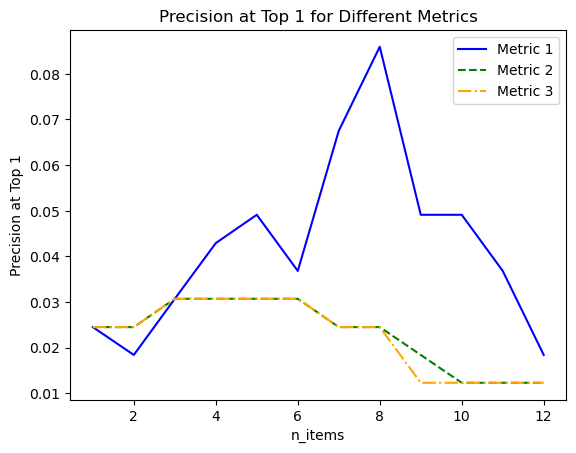

In [96]:
line_styles = ['-', '--', '-.'] 
colors = ['blue', 'green', 'orange'] 
for metric in range(1, 4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cat_cos = recommend_items_by_user_cos(trainset, testset, mean_emotions_by_user_cat, mean_emotions_by_user_profile_cat, n, metric, random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cat_cos, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    
    plt.plot(range(1, 13), precision_top1_cos_vgg16, label="Metric " + str(metric), 
             linestyle=line_styles[metric-1], color=colors[metric-1])

plt.legend()
plt.xlabel('n_items') 
plt.ylabel('Precision at Top 1') 
plt.title('Precision at Top 1 for Different Metrics') 
plt.show()

In [105]:
rec_cat_cos = recommend_items_by_user_cos(trainset, testset, mean_emotions_by_user_cat, mean_emotions_by_user_profile_cat, n=8, metric=1, random_items_dict=random_items_dict)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cat_cos, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0859  Average Recall: 0.0583  Average F1-score: 0.0675
k=2:  Average Precision: 0.0675  Average Recall: 0.0849  Average F1-score: 0.0730
k=3:  Average Precision: 0.0798  Average Recall: 0.1462  Average F1-score: 0.1008
k=4:  Average Precision: 0.0782  Average Recall: 0.1984  Average F1-score: 0.1097
k=5:  Average Precision: 0.0859  Average Recall: 0.2689  Average F1-score: 0.1274
k=6:  Average Precision: 0.0879  Average Recall: 0.3200  Average F1-score: 0.1351
k=7:  Average Precision: 0.0859  Average Recall: 0.3640  Average F1-score: 0.1363
k=8:  Average Precision: 0.0905  Average Recall: 0.4274  Average F1-score: 0.1470
k=9:  Average Precision: 0.0907  Average Recall: 0.4755  Average F1-score: 0.1501
k=10:  Average Precision: 0.0883  Average Recall: 0.5051  Average F1-score: 0.1484


C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\2837037978.py:65: RuntimeWarning: invalid value encountered in scalar divide
  item_value = sum_user/sum_sim
C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\2837037978.py:65: RuntimeWarning: invalid value encountered in scalar divide
  item_value = sum_user/sum_sim
C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\2837037978.py:65: RuntimeWarning: invalid value encountered in scalar divide
  item_value = sum_user/sum_sim
C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\2837037978.py:65: RuntimeWarning: invalid value encountered in scalar divide
  item_value = sum_user/sum_sim
C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\2837037978.py:65: RuntimeWarning: invalid value encountered in scalar divide
  item_value = sum_user/sum_sim
C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\2837037978.py:65: RuntimeWarning: invalid value encountered in scalar divide
  item_value = sum_user/sum_sim
C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\283

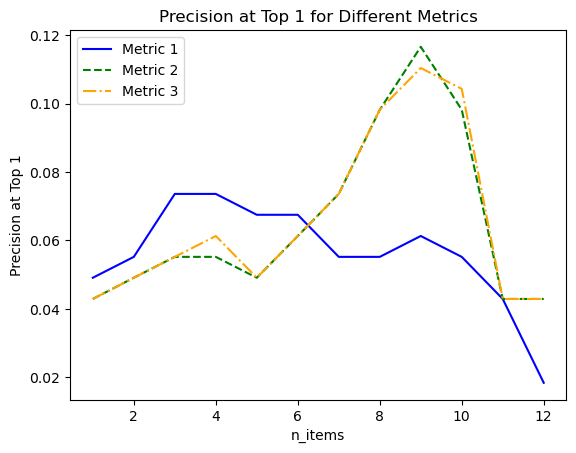

In [97]:
line_styles = ['-', '--', '-.'] 
colors = ['blue', 'green', 'orange'] 
for metric in range(1, 4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cat_cos = recommend_items_by_user_cos(trainset, testset, mean_emotions_by_user_dim, mean_emotions_by_user_profile_dim, n, metric, random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cat_cos, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    
    plt.plot(range(1, 13), precision_top1_cos_vgg16, label="Metric " + str(metric), 
             linestyle=line_styles[metric-1], color=colors[metric-1])

plt.legend()
plt.xlabel('n_items') 
plt.ylabel('Precision at Top 1') 
plt.title('Precision at Top 1 for Different Metrics') 
plt.show()

In [106]:
rec_cat_cos = recommend_items_by_user_cos(trainset, testset, mean_emotions_by_user_dim, mean_emotions_by_user_profile_dim, n=9, metric=2, random_items_dict=random_items_dict)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cat_cos, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\2837037978.py:65: RuntimeWarning: invalid value encountered in scalar divide
  item_value = sum_user/sum_sim


k=1:  Average Precision: 0.1166  Average Recall: 0.0736  Average F1-score: 0.0879
k=2:  Average Precision: 0.0798  Average Recall: 0.0971  Average F1-score: 0.0853
k=3:  Average Precision: 0.0777  Average Recall: 0.1472  Average F1-score: 0.0988
k=4:  Average Precision: 0.0767  Average Recall: 0.1892  Average F1-score: 0.1064
k=5:  Average Precision: 0.0773  Average Recall: 0.2362  Average F1-score: 0.1138
k=6:  Average Precision: 0.0767  Average Recall: 0.2740  Average F1-score: 0.1174
k=7:  Average Precision: 0.0727  Average Recall: 0.3006  Average F1-score: 0.1150
k=8:  Average Precision: 0.0729  Average Recall: 0.3425  Average F1-score: 0.1182
k=9:  Average Precision: 0.0750  Average Recall: 0.3875  Average F1-score: 0.1237
k=10:  Average Precision: 0.0755  Average Recall: 0.4346  Average F1-score: 0.1267


C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\930791097.py:74: RuntimeWarning: invalid value encountered in scalar divide
  item_value = sum_user/sum_sim
C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\930791097.py:74: RuntimeWarning: invalid value encountered in scalar divide
  item_value = sum_user/sum_sim
C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\930791097.py:74: RuntimeWarning: invalid value encountered in scalar divide
  item_value = sum_user/sum_sim
C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\930791097.py:74: RuntimeWarning: invalid value encountered in scalar divide
  item_value = sum_user/sum_sim
C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\930791097.py:74: RuntimeWarning: invalid value encountered in scalar divide
  item_value = sum_user/sum_sim
C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\930791097.py:74: RuntimeWarning: invalid value encountered in scalar divide
  item_value = sum_user/sum_sim
C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\930791097

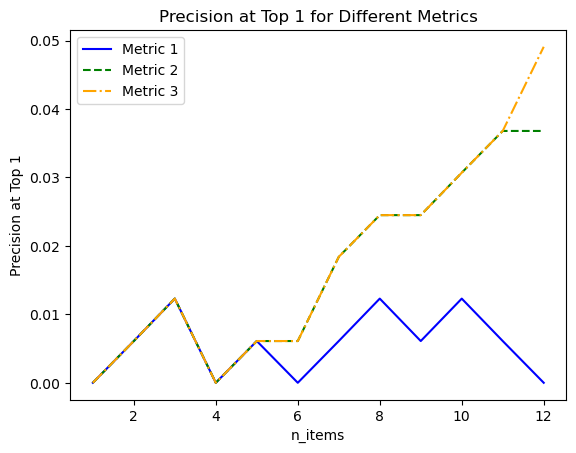

In [107]:
line_styles = ['-', '--', '-.'] 
colors = ['blue', 'green', 'orange'] 
for metric in range(1, 4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cat_cos = recommend_items_by_user_eucl(trainset, testset, mean_emotions_by_user_cat, mean_emotions_by_user_profile_cat, n, metric, random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cat_cos, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    
    plt.plot(range(1, 13), precision_top1_cos_vgg16, label="Metric " + str(metric), 
             linestyle=line_styles[metric-1], color=colors[metric-1])

plt.legend()
plt.xlabel('n_items') 
plt.ylabel('Precision at Top 1') 
plt.title('Precision at Top 1 for Different Metrics') 
plt.show()

In [108]:
rec_cat_cos = recommend_items_by_user_eucl(trainset, testset, mean_emotions_by_user_cat, mean_emotions_by_user_profile_cat, n=12, metric=3, random_items_dict=random_items_dict)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cat_cos, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\930791097.py:114: RuntimeWarning: invalid value encountered in scalar divide
  item_value = sum_user/sum_sim


k=1:  Average Precision: 0.0491  Average Recall: 0.0307  Average F1-score: 0.0368
k=2:  Average Precision: 0.0429  Average Recall: 0.0491  Average F1-score: 0.0450
k=3:  Average Precision: 0.0389  Average Recall: 0.0706  Average F1-score: 0.0491
k=4:  Average Precision: 0.0353  Average Recall: 0.0828  Average F1-score: 0.0487
k=5:  Average Precision: 0.0356  Average Recall: 0.1012  Average F1-score: 0.0520
k=6:  Average Precision: 0.0358  Average Recall: 0.1288  Average F1-score: 0.0552
k=7:  Average Precision: 0.0377  Average Recall: 0.1656  Average F1-score: 0.0605
k=8:  Average Precision: 0.0429  Average Recall: 0.2137  Average F1-score: 0.0705
k=9:  Average Precision: 0.0443  Average Recall: 0.2444  Average F1-score: 0.0741
k=10:  Average Precision: 0.0442  Average Recall: 0.2720  Average F1-score: 0.0751


C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\930791097.py:74: RuntimeWarning: invalid value encountered in scalar divide
  item_value = sum_user/sum_sim
C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\930791097.py:74: RuntimeWarning: invalid value encountered in scalar divide
  item_value = sum_user/sum_sim
C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\930791097.py:74: RuntimeWarning: invalid value encountered in scalar divide
  item_value = sum_user/sum_sim
C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\930791097.py:74: RuntimeWarning: invalid value encountered in scalar divide
  item_value = sum_user/sum_sim
C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\930791097.py:74: RuntimeWarning: invalid value encountered in scalar divide
  item_value = sum_user/sum_sim
C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\930791097.py:74: RuntimeWarning: invalid value encountered in scalar divide
  item_value = sum_user/sum_sim
C:\Users\lmir\AppData\Local\Temp\ipykernel_34536\930791097

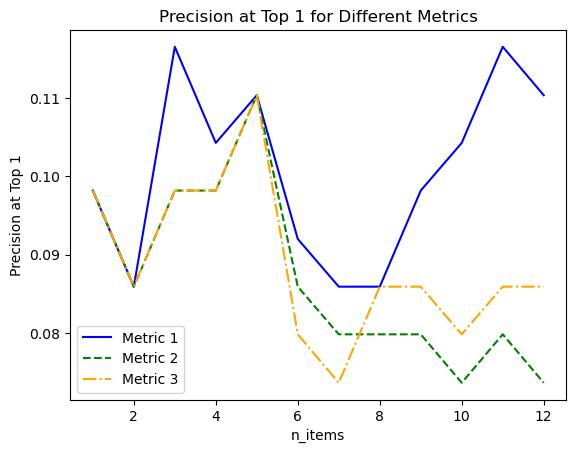

In [103]:
line_styles = ['-', '--', '-.'] 
colors = ['blue', 'green', 'orange'] 
for metric in range(1, 4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cat_cos = recommend_items_by_user_eucl(trainset, testset, mean_emotions_by_user_dim, mean_emotions_by_user_profile_dim, n, metric, random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cat_cos, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    
    plt.plot(range(1, 13), precision_top1_cos_vgg16, label="Metric " + str(metric), 
             linestyle=line_styles[metric-1], color=colors[metric-1])

plt.legend()
plt.xlabel('n_items') 
plt.ylabel('Precision at Top 1') 
plt.title('Precision at Top 1 for Different Metrics') 
plt.show()

In [109]:
rec_cat_cos = recommend_items_by_user_eucl(trainset, testset, mean_emotions_by_user_dim, mean_emotions_by_user_profile_dim, n=3, metric=1, random_items_dict=random_items_dict)
ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cat_cos, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.1166  Average Recall: 0.0593  Average F1-score: 0.0767
k=2:  Average Precision: 0.0767  Average Recall: 0.0798  Average F1-score: 0.0761
k=3:  Average Precision: 0.0716  Average Recall: 0.1155  Average F1-score: 0.0861
k=4:  Average Precision: 0.0736  Average Recall: 0.1626  Average F1-score: 0.0988
k=5:  Average Precision: 0.0785  Average Recall: 0.2157  Average F1-score: 0.1127
k=6:  Average Precision: 0.0757  Average Recall: 0.2618  Average F1-score: 0.1149
k=7:  Average Precision: 0.0710  Average Recall: 0.2853  Average F1-score: 0.1115
k=8:  Average Precision: 0.0713  Average Recall: 0.3272  Average F1-score: 0.1151
k=9:  Average Precision: 0.0723  Average Recall: 0.3712  Average F1-score: 0.1191
k=10:  Average Precision: 0.0699  Average Recall: 0.3947  Average F1-score: 0.1172
